<a href="https://colab.research.google.com/github/sato563/Prog2_11th/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プログラム２

### Numpyを使用してドーナツ型を作成するプログラム
### ・Numpyを使ってこんなこともできるんだと思てもらいたい
---



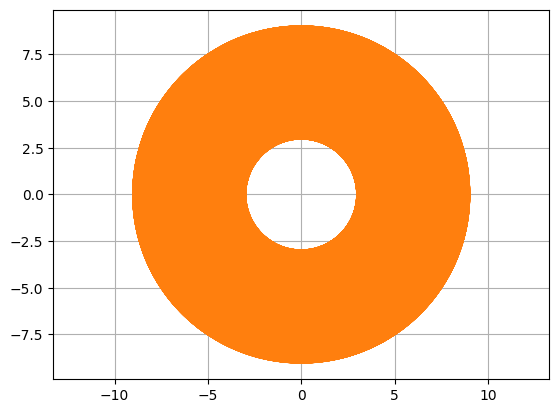

In [68]:
import numpy as np
from matplotlib import pyplot as plt

A1, A2, T = 3, 3, 10
t = np.linspace(0,20,1000)
y_1 = A1 * np.sin(2*np.pi*t/T)
y_2 = A2 * np.cos(2*np.pi*t/T)

y1 = (A1+3) * np.sin(2*np.pi*t/T)
y2 = (A2+3) * np.cos(2*np.pi*t/T)

data1=np.round(y1,2)
data2=np.round(y2,2)

data1=data1.tolist()
data2=data2.tolist()

a=len(y1)

while a>0:
  b=len(y1)-a
  plt.plot(y_2+data1[b],y_1+data2[b],color='tab:orange')
  a-=1


plt.grid()
plt.axis('equal')
plt.show()

